# HW 3: Jonathan Levine

## Setup

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib notebook
from ptsa.data import readers
import pandas as pd  # optional
import sys
sys.path.append('/data/global/ptsa_plot/')
from ptsa_plot.topo import topoplot
from scipy.stats import kurtosis
ltpFR2_events = np.load('/data/exp_events/ltpFR2_events.npy')
import pickle

In [2]:

events =  ltpFR2_events[(ltpFR2_events['type']=='WORD')
                                &(ltpFR2_events['subject']!='LTP251')
                                &(ltpFR2_events['subject']!='LTP295')
                                &(ltpFR2_events['subject']!='LTP296')
                                &(ltpFR2_events['subject']!='LTP297')
                                &(ltpFR2_events['subject']!='LTP299')
                                &(ltpFR2_events['subject']!='LTP316')
                                &(ltpFR2_events['subject']!='LTP317')
                                &(ltpFR2_events['subject']!='LTP318')
                                &(ltpFR2_events['subject']!='LTP321')
                               ]


In [3]:
events_recalled = events[(events['recalled'] == 1)].view(np.recarray)
events_forgot = events[(events['recalled'] == 0)].view(np.recarray)

# Remove Artifact

In [4]:
import numpy.ma as ma
artA = events_recalled['artifactMS'] > 0
events_recalled_new = ma.masked_array(events_recalled, mask=artA)
artA = events_recalled_new['artifactMS'] < 1600
events_recalled_final = ma.masked_array(events_recalled_new, mask=artA)

artB = events_forgot['artifactMS'] > 0
events_forgot_new = ma.masked_array(events_forgot, mask=artB)
artB = events_forgot_new['artifactMS'] < 1600
events_forgot_final = ma.masked_array(events_forgot_new, mask=artB)

#events_forgot_new = events_forgot[(events_forgot['artifactMS'] < 0) & (events_forgot['artifactMS'] > 1600)]

In [15]:
events_recalled_final.data

rec.array([ ('LTP093',  1,   1., 'WORD',   1.,      0.,  nan,  24000.,  10., 'BALLOON',    75.,  1.,  0.,  nan,  nan,   1.40967114e+12, 1, '/data/eeg/scalp/ltp/ltpFR2/LTP093/session_0/eeg/eeg.reref/LTP093_2Sep14_1020',  285930,   -1,   -1, -1.        ,  -1.00000000e+00, 1),
 ('LTP093',  1,   1., 'WORD',   2.,      0.,  nan,  24000.,  10., 'MAILBOX',   857.,  1.,  0.,  nan,  nan,   1.40967114e+12, 1, '/data/eeg/scalp/ltp/ltpFR2/LTP093/session_0/eeg/eeg.reref/LTP093_2Sep14_1020',  287178,   -1,   -1, -1.        ,  -1.00000000e+00, 1),
 ('LTP093',  1,   1., 'WORD',   3.,      0.,  nan,  24000.,  10., 'FLOWER',   584.,  1.,  0.,  nan,  nan,   1.40967114e+12, 1, '/data/eeg/scalp/ltp/ltpFR2/LTP093/session_0/eeg/eeg.reref/LTP093_2Sep14_1020',  288443,   -1,   -1, -1.        ,  -1.00000000e+00, 1),
 ...,
 ('LTP330', 24,  24., 'WORD',  19.,  24000.,  11.,  24000.,  13., 'TOILET',  1475.,  1.,  0.,  nan,  nan,   1.47706925e+12, 1, '/data/eeg/scalp/ltp/ltpFR2/LTP330/session_23/eeg/eeg.reref/LTP33

# Without Filtering

In [5]:
eegRecalled = readers.EEGReader(events=events_recalled_final.data, channels=np.array(["129"]),
                        start_time=-0.2, end_time=1.6).read()

print("halway done")

eegForgot = readers.EEGReader(events=events_forgot_final.data, channels=np.array(["129"]),
                        start_time=-0.2, end_time=1.6).read()

/data/global/Anaconda-4.4.0/lib/python3.6/site-packages/ptsa/data/readers/BaseRawReader.py:100: RuntimeWarning: invalid value encountered in multiply
  dtype=np.float) * np.nan


halway done
Cannot read full chunk of data for offset 2208709End of read interval  is outside the bounds of file /data/eeg/scalp/ltp/ltpFR2/LTP122/session_2/eeg/eeg.reref/LTP122_28Jan15_0916.129


# With 60Hz Filtering

In [5]:

eegRecalled = readers.EEGReader(events=events_recalled, channels=np.array(["129"]),
                        start_time=-0.2, end_time=1.6).read().filtered(freq_range=[58.,62.], filt_type="stop")


print("halway done")

eegForgot = readers.EEGReader(events=events_forgot, channels=np.array(["129"]),
                        start_time=-0.2, end_time=1.6).read().filtered(freq_range=[58.,62.], filt_type="stop")

/data/global/Anaconda-4.4.0/lib/python3.6/site-packages/ptsa/data/readers/BaseRawReader.py:100: RuntimeWarning: invalid value encountered in multiply
  dtype=np.float) * np.nan
/data/global/Anaconda-4.4.0/lib/python3.6/site-packages/ptsa/data/TimeSeriesX.py:264: UserWarning: The filtered method is not very flexible. Consider using filters in ptsa.data.filters instead.
  warnings.warn("The filtered method is not very flexible. "


halway done
Cannot read full chunk of data for offset 2208709End of read interval  is outside the bounds of file /data/eeg/scalp/ltp/ltpFR2/LTP122/session_2/eeg/eeg.reref/LTP122_28Jan15_0916.129


In [ ]:


(artifactMS < 0 j
artifactMS > 1600

In [6]:

Rbaseline = np.mean((eegRecalled.data[0])[:,:100],axis=1)
Rcorrected = (eegRecalled.data[0])[:, 100:].transpose() - Rbaseline.transpose()
Ravg = np.mean(Rcorrected,axis=1)

Fbaseline = np.mean((eegForgot.data[0])[:,:100], axis=1)
Fcorrected = (eegForgot.data[0])[:, 100:].transpose() - Fbaseline.transpose()
Favg = np.mean(Fcorrected,axis=1)

t = eegRecalled.time.values[100:]

In [7]:
#del events_recalled
#del events_forgot

pickle.dump(eegRecalled, open( "eegR.p", "wb" ) )
pickle.dump(eegForgot, open( "eegF.p", "wb" ) )

KeyboardInterrupt: 


# Question 1.1

<IPython.core.display.Javascript object>


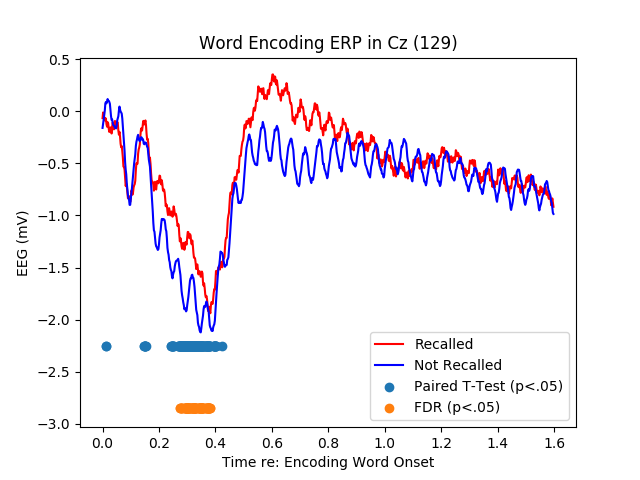

/data/global/Anaconda-4.4.0/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  after removing the cwd from sys.path.
/data/global/Anaconda-4.4.0/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/data/global/Anaconda-4.4.0/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


In [8]:
plt.clf
plt.figure
plt.plot(t, Ravg, c = 'r', label='Recalled')
plt.hold(True)
plt.plot(t, Favg,c = 'b', label='Not Recalled')
plt.ylabel('EEG (mV)')
plt.xlabel('Time re: Encoding Word Onset')
plt.legend()
plt.title("Word Encoding ERP in Cz (129)")


# Question 1.2

In [9]:
subs = np.unique(eegRecalled.events.values['subject'])
n = len(subs)

recSub = np.zeros((n,800))
forSub = np.zeros((n,800))

i = 0

for s in subs:
    sbR = eegRecalled.sel(events=eegRecalled.events.values['subject']==s).data[0]
    sbRbase = np.mean(sbR[:,:100],axis=1)
    sbRcorrected = sbR[:,100:].transpose() - sbRbase.transpose()
    sbRavg = np.mean(sbRcorrected,axis=1)
    recSub[i] = sbRavg
    
    sbF = eegForgot.sel(events=eegForgot.events.values['subject']==s).data[0]
    sbFbase = np.mean(sbF[:,:100],axis=1)
    sbFcorrected = sbF[:,100:].transpose() - sbFbase.transpose()
    sbFavg = np.mean(sbFcorrected,axis=1)
    forSub[i] = sbFavg
    print(n-i)
    i= i + 1



47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1


In [10]:
from scipy.stats import ttest_rel

pvals = (ttest_rel(recSub,forSub, axis=0))[1]
len(pvals)

sig_locs = np.where(pvals < 0.05)
sig_locs = sig_locs[0]
sig_locs = sig_locs/1000
sig_y = np.ones(len(sig_locs))*-2.25
plt.figure
plt.scatter(sig_locs,sig_y, label="Paired T-Test (p<.05)")

#plt.savefig("ERP_1")

# FDR

In [11]:
m = 800
alpha = .05
sorted_pvals = np.sort(pvals)
arg_sorted_pvals = np.argsort(pvals)
j = 800
for i in range(1,m):
    
    if (not(sorted_pvals[i-1] <= alpha* (i)/m)):
        break

threshold = i
print(threshold)
#Why is nothing significant??????????!!!!!   

locs = arg_sorted_pvals[:(threshold-1)]
loc_y = np.ones(len(locs))*-2.85
plt.scatter(locs/1000,loc_y,label="FDR (p<.05)")
plt.legend()
#plt.savefig("P1_ERP_FINAL")
plt.savefig("P1_ERP_FINAL_Artifact")

82


# Question 2.1

In [4]:
# Load in scalp electrode locations:
with open('/data/scalp_electrode_locations/HCGSN128.dat', 'r') as sensorfile:
    angles, radii = sensorfile.readlines()
    sensors = (np.r_[np.array([np.float(a)
                               for a in angles.strip().split()]), 0],
               np.r_[[np.float(r) for r in radii.strip().split()], 0])
sensor_names = np.array(['{:03}'.format(x) for x in range(1, len(sensors[0])+1)])









In [ ]:


# rec = np.zeros((num_chans,1))
# forg = np.zeros((numChans,1))

# i = 0

# for n in sensor_names:
    
   
#     rec[i] = recMean
#     forg[i] = sbFMean
#     print(n-i)
#     i= i + 1

In [ ]:
subs = np.unique(events_recalled['subject'])
num_chans = len(sensor_names)
toFill = np.zeros((num_chans,1))

R_values = {} # type: dict[str, list]
F_values = {} # type: dict[str, list]

test = []


import cluster_helper.cluster  #imports cluster-helper



def FUNC(zipped):
    from ptsa.data import readers
    import numpy as np
    r_events = zipped[0]
    f_events = zipped[1]
    
    #s = zipped[3][0]
    chan = zipped[2]
    #r_events = r_events[r_events['subject']==s]
    #f_events = f_events[f_events['subject'] ==s]
    
    R_reader = readers.EEGReader(events=r_events, channels=np.array([chan]),
                        start_time=-0.2, end_time=0.8).read()
    sbR = R_reader.data[0]
    sbRbase = np.mean(sbR[:,:100],axis=1)
    sbRcorrected = sbR[:,250:].transpose() - sbRbase.transpose()
    sbRavg = np.mean(sbRcorrected,axis=1)
    
    F_reader = readers.EEGReader(events=f_events, channels=np.array([chan]),
                        start_time=-0.2, end_time=0.8).read()
    sbF = F_reader.data[0]
    sbFbase = np.mean(sbF[:,:100],axis=1)
    sbFcorrected = sbF[:,250:].transpose() - sbFbase.transpose()
    sbFavg = np.mean(sbFcorrected,axis=1)
    
    return [np.mean(sbRavg), np.mean(sbFavg)]
                                

#Get a hold of some worker nodes, accessed via the view object.
#with cluster_helper.cluster.cluster_view(scheduler="sge", queue="all.q", num_jobs=10, cores_per_job=1) as view:   

for chan in sensor_names:
    print(chan)
    R_values[chan] = []
    F_values[chan] = []

#         print("chan # ")
#         print(chan)
    iterable = []

    for s in subs:
        sub_r = events_recalled[events_recalled['subject'] == s]
        sub_f = events_forgot[events_forgot['subject'] == s]

        aaa = [sub_r, sub_f, chan]
        iterable.append(aaa)

#         #for sesh in np.unique(sub_r['session']):
#             aaa = [sub_r[sub_r['session'] == sesh], sub_f[sub_f['session'] == sesh], [chan], [s]]
#             iterable.append(aaa)
    #results = view.map(FUNC,iterable) 
    results = [FUNC(x) for x in iterable]
    #print(results)
#         bySubjectR[s] = np.mean(results)
#         print(bySubjectR)
#         test.append(bySubjectR)


    #results = view.map(FUNC, iterable)
    #
    for pair in results:
        R_values[chan].append(pair[0])
        F_values[chan].append(pair[1])



#     for chan in sensor_names[:2]:
#         print(chan)
#         iterable = []
#         for s in subs[0:5]:
#             aaa = [events_recalled, events_forgot, [chan], [s]]
#             iterable.append(aaa)
#             #results = list(map(FUNC,iterable))    
#         results = view.map(FUNC, iterable)
#         #results = [FUNC(x) for x in iterable]
#         R_values[chan] = results[0]
#         F_values[chan] = results[1]

pickle.dump( R_values, open( "r_dict_ALL_new.p", "wb" ) )
pickle.dump( F_values, open( "f_dict_ALL_new.p", "wb" ) )

001


/data/global/Anaconda-4.4.0/lib/python3.6/site-packages/ptsa/data/readers/BaseRawReader.py:100: RuntimeWarning: invalid value encountered in multiply
  dtype=np.float) * np.nan


Cannot read full chunk of data for offset 2208709End of read interval  is outside the bounds of file /data/eeg/scalp/ltp/ltpFR2/LTP122/session_2/eeg/eeg.reref/LTP122_28Jan15_0916.001


In [10]:
R_values

{'001': [0.54198364450959935,
  3.6719805886804702,
  0.07211253252858546,
  0.50569589690541428,
  -1.5206355618597662,
  1.1098431214705986,
  3.1115707454548849,
  5.2368425249201946,
  -1.2361559265083959,
  0.56083078633631611,
  2.6362875760910609,
  3.0326168301730196,
  -3.9144975592162092,
  0.45480775232165738,
  -3.8106769290820606,
  -1.8206752492612963,
  2.08834548735536,
  3.6637393420535167,
  -2.5508194435371716,
  -2.2448391626499689,
  -0.05075263539999969,
  -3.1304250759239189,
  -1.4610902183370447,
  -4.6328466643482091,
  1.0132018290521947,
  -1.9008417764641807,
  4.0503456066357728,
  -2.0141590219828567,
  -0.71608538966225266,
  0.25545192905248776,
  -5.7672311061280093,
  0.75541059452792891,
  -0.49612501194737529,
  -0.17770411790745863,
  -0.034800525149447051,
  4.699700983405882,
  -2.8345618883935439,
  1.1720606115979357,
  3.6133898636322073,
  -0.71733299969999986,
  -8.9516144279316947,
  3.5129773590441151,
  2.268018688532043,
  -0.16773156834

In [10]:
pickle.dump( R_values, open( "r_dict_first5.p", "wb" ) )
pickle.dump( F_values, open( "f_dict_first5.p", "wb" ) )

{'001': [1.367922554917377,
  0.36307638347545285,
  -0.18076621761095998,
  0.40178869399115913,
  -0.80404132633409886],
 '002': [0.42986713327830878,
  -3.0905032506508214,
  -1.074348930041414,
  1.3534787455018573,
  3.9452474093874677],
 '003': [-0.35459889012495727,
  -4.8761601805681805,
  -1.591726954800502,
  -0.25654913420667763,
  2.7784694086417749],
 '004': [-0.43163741942412853,
  -3.5506086724060739,
  -1.1923682790041412,
  0.17172949880498475,
  1.6558147335076761],
 '005': [-0.57694209568998278,
  -2.72908638079008,
  -1.2119958492706551,
  -0.36490279658006136,
  1.9073092510831331]}

In [ ]:
saveF = pickle.load( open( "f_dict_ALL.p", "rb" ) )
saveR = pickle.load( open( "r_dict_ALL.p", "rb" ) )

toPlotF = []
toPlotR = []

for chan in saveF:
    print(chan)
    toPlotF.append(saveF[chan][0])
    toPlotR.append(saveR[chan][0])



In [ ]:
plt.clf()

plt.figure()
topoplot(values=toPlotF, sensors=sensors, cmap='bwr', sensor_props={'marker': ''})
plt.title('Not Recalled')
plt.savefig('map_F')

plt.figure()
topoplot(values=toPlotR, sensors=sensors, cmap='bwr', sensor_props={'marker': ''})
plt.title('Recalled')
plt.savefig('map_R')


In [ ]:
pickle.load( open( "pickleTEST.p", "rb" ) )

In [ ]:
list